In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as mpl

import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('/content/IMDb Movies India.csv',encoding='latin-1')

In [ ]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
dataset.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
genre_dataset = dataset[['Genre']].copy()

genre_dataset.dropna(subset=['Genre'], inplace=True)

all_genres = ",".join(genre_dataset['Genre'].str.join(","))

genre_list = all_genres.split(",")

unique_genres = set(genre.strip() for genre in genre_list)

unique_genres = list(unique_genres)

print(unique_genres)

['', '-', 'l', 'y', 'A', 'w', 'i', 'e', 'W', 'F', 'h', 'o', 'g', 'B', 'd', 'r', 'm', 's', 'p', 'M', 'H', 'V', 'T', 'n', 'C', 'a', 'S', 't', 'D', 'u', 'v', 'R', 'c', 'N']


In [ ]:
dataset['Genre'] = dataset['Genre'].str.split(', ')

genre_dataset = dataset.explode('Genre')

genre_counts = genre_dataset['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']


genre_mean_ratings = genre_dataset.groupby('Genre')['Rating'].mean().reset_index()
genre_mean_ratings.columns = ['Genre', 'Mean Rating']


genre_stats = pd.merge(genre_counts, genre_mean_ratings, on='Genre')

print(genre_stats)

          Genre  Count  Mean Rating
0         Drama   7243     5.998558
1        Action   3543     5.430365
2       Romance   2449     5.750533
3        Comedy   2029     5.737290
4      Thriller   1713     5.536187
5         Crime   1322     5.727813
6        Family    943     6.195173
7       Musical    589     6.156627
8     Adventure    541     5.816839
9        Horror    524     4.785000
10      Mystery    513     5.801892
11      Fantasy    458     5.819512
12  Documentary    383     7.613287
13    Biography    208     6.819718
14      History    207     6.804688
15    Animation    125     5.956164
16        Music     90     6.137705
17        Sport     70     6.494118
18       Sci-Fi     58     5.272973
19          War     47     6.041176
20         News      9     7.250000
21      Western      5     5.566667
22   Reality-TV      3          NaN
23        Short      1          NaN


In [ ]:
 dataset.describe(include = 'O')

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,[Drama],8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [ ]:
dataset = dataset.dropna(subset=['Rating'])

dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [ ]:
dataset.dropna(subset=['Name', 'Year', 'Duration', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [ ]:
dataset['Year'] = dataset['Year'].str.replace(r'\D', '', regex=True).astype(int)

In [ ]:
dataset['Duration'] = dataset['Duration'].str.replace(r'\D', '', regex=True).astype(float)

In [ ]:
dataset.describe(include = 'O')

,Name,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,5688,5659,5688,5688,5688,5688,5688
unique,5410,376,2027,2438,1974,2336,2572
top,Zindagi,[Drama],7,David Dhawan,Amitabh Bachchan,Rekha,Pran
freq,4,844,93,41,104,52,57


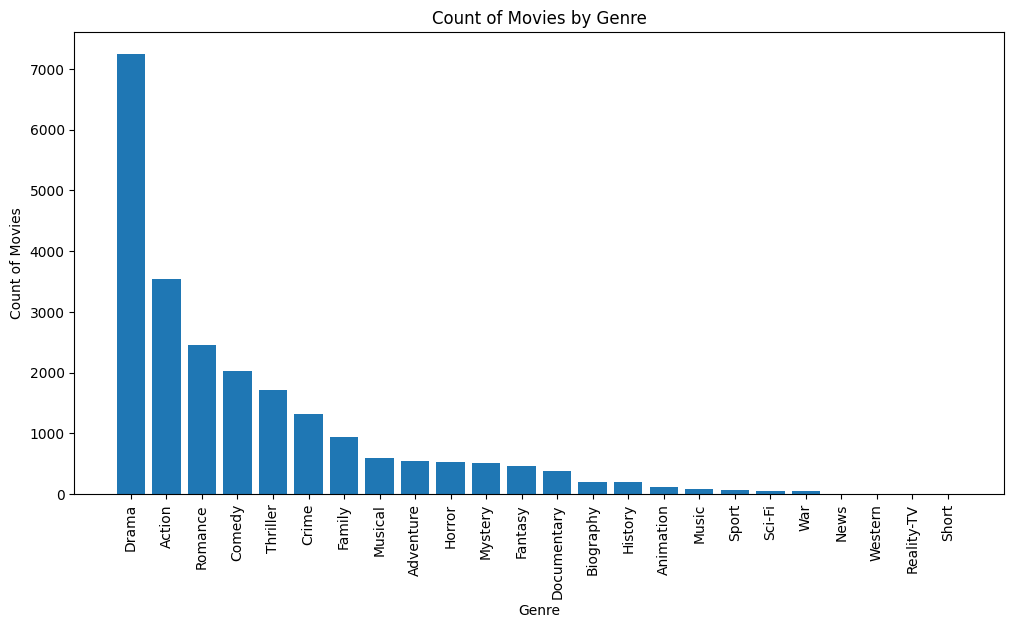

In [ ]:
genre_stats = genre_stats.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(genre_stats['Genre'], genre_stats['Count'])
plt.xlabel('Genre')
plt.ylabel('Count of Movies')
plt.title('Count of Movies by Genre')
plt.xticks(rotation=90)
plt.show()

In [ ]:
dataset.loc[dataset['Rating']==dataset['Rating'].max()]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
4365,Love Qubool Hai,2020,94.0,"[Drama, Romance]",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


In [ ]:
dataset.loc[(dataset['Rating'].min()==dataset['Rating']) ]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
6238,Sadak 2,2020,133.0,"[Action, Drama]",1.1,"67,785",Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt


In [ ]:
acts = dataset[['Actor 1', 'Actor 2', 'Actor 3']].value_counts().sort_values(ascending=False).head(10)
acts

Actor 1           Actor 2        Actor 3       
Anil Kapoor       Sridevi        Anupam Kher       3
Dibakar Banerjee  Karan Johar    Anurag Kashyap    3
Dharmendra        Sunny Deol     Bobby Deol        3
Nargis            Pradeep Kumar  Pran              2
Sunny Deol        Anil Kapoor    Sridevi           2
Devika Rani       Ashok Kumar    Kamta Prasad      2
Dharmendra        Saira Banu     Feroz Khan        2
Manoj Kumar       Hema Malini    Prem Nath         2
Shashi Kapoor     Govinda        Neelam Kothari    2
Rishi Kapoor      Zeba Bakhtiar  Ashwini Bhave     2
dtype: int64

In [ ]:
acts1 = dataset['Actor 1'].value_counts().sort_values(ascending=False).head(10)
acts1

Amitabh Bachchan      104
Mithun Chakraborty     93
Ashok Kumar            91
Dharmendra             90
Jeetendra              89
Akshay Kumar           82
Shashi Kapoor          81
Rajesh Khanna          74
Ajay Devgn             70
Sanjay Dutt            61
Name: Actor 1, dtype: int64

In [ ]:
acts2 = dataset['Actor 2'].value_counts().sort_values(ascending=False).head(10)
acts2

Rekha                 52
Hema Malini           48
Dharmendra            38
Mithun Chakraborty    38
Juhi Chawla           34
Akshay Kumar          34
Sharmila Tagore       32
Shabana Azmi          31
Sunil Shetty          28
Raveena Tandon        28
Name: Actor 2, dtype: int64

In [ ]:
acts3 = dataset['Actor 3'].value_counts().sort_values(ascending=False).head(10)
acts3

Pran                  57
Anupam Kher           51
Prem Chopra           32
Paresh Rawal          30
Mithun Chakraborty    29
Shatrughan Sinha      28
Amrish Puri           26
Om Puri               26
Asrani                26
Aruna Irani           24
Name: Actor 3, dtype: int64

In [ ]:
top_20_rated_movies_of_actor=dataset[(dataset['Rating']>=7)]['Actor 1'].head(20)

In [ ]:
top_20_actor=dataset.groupby(top_20_rated_movies_of_actor)['Rating'].mean()
top_20_actor

Actor 1
Aamir Khan             8.4
Amitabh Bachchan       7.4
Anil Kapoor            7.2
Dhruva Padmakumar      8.1
Ehan Bhat              7.4
Geeta Agrawal          7.3
Guru Dutt              7.2
Jennifer Kendal        7.5
Jimmy Sheirgill        7.4
Kalki Koechlin         7.5
Madhavan               7.3
Manoj Bajpayee         8.1
Nachiket Patwardhan    7.7
Naseeruddin Shah       7.8
Raj Nidimoru           7.3
Rajvvir Aroraa         7.3
Rasika Dugal           7.0
Sanjay Deyali          8.0
Shabana Azmi           7.1
Srishti Gautam         7.8
Name: Rating, dtype: float64

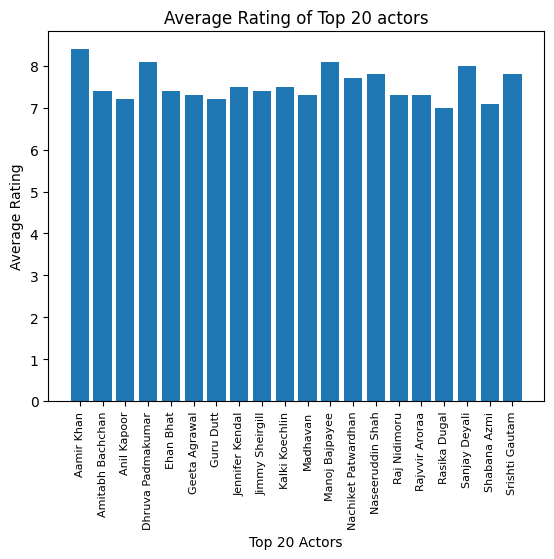

In [ ]:
plt.bar(top_20_actor.index,top_20_actor.values)
plt.xlabel("Top 20 Actors")
plt.ylabel("Average Rating")
plt.title("Average Rating of Top 20 actors")
plt.xticks(rotation='vertical', fontsize=8)
plt.show()

In [ ]:
top_20_rated_movies_of_director=dataset[(dataset['Rating']>=7)]['Director'].head(20)

In [ ]:
dataset.groupby(top_20_rated_movies_of_director)['Rating'].mean()

Director
Amrit Sagar                   8.1
Aparna Sen                    7.3
Dhruv Sachdev                 8.0
Gaurav Bakshi                 7.0
Jayoo Patwardhan              7.7
Konkona Sen Sharma            7.5
Krishna D.K.                  7.3
Nagesh Kukunoor               7.8
Padmakumar Narasimhamurthy    8.1
Pramod Chakravorty            7.2
Praveen Damle                 7.3
Prawaal Raman                 7.3
Rajkumar Hirani               8.4
Shoojit Sircar                7.4
Suhaib Ilyasi                 7.8
Umesh Shukla                  7.4
Vidhu Vinod Chopra            7.2
Vikram K. Kumar               7.3
Vishwesh Krishnamoorthy       7.4
Name: Rating, dtype: float64

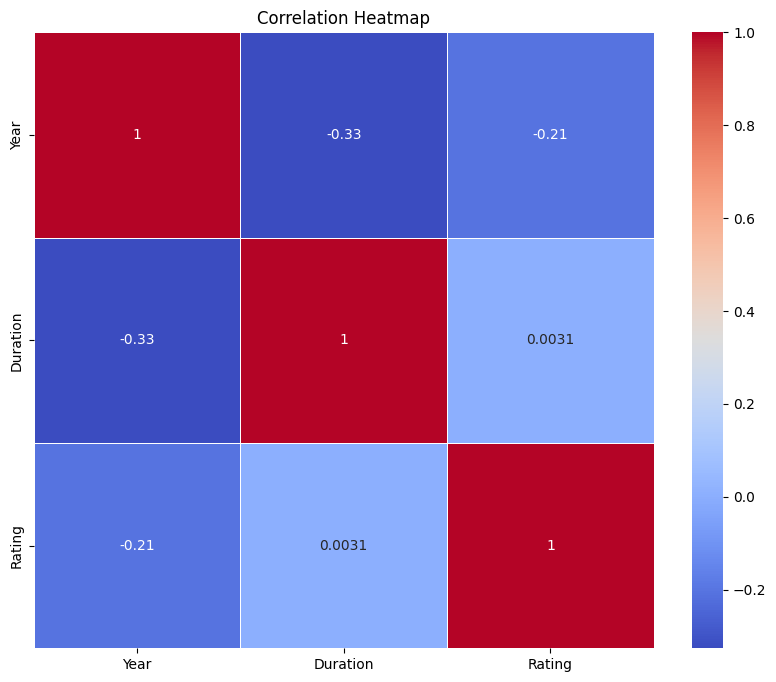

In [ ]:
correlation_matrix = dataset[['Year', 'Duration', 'Rating', 'Votes']].corr()

plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

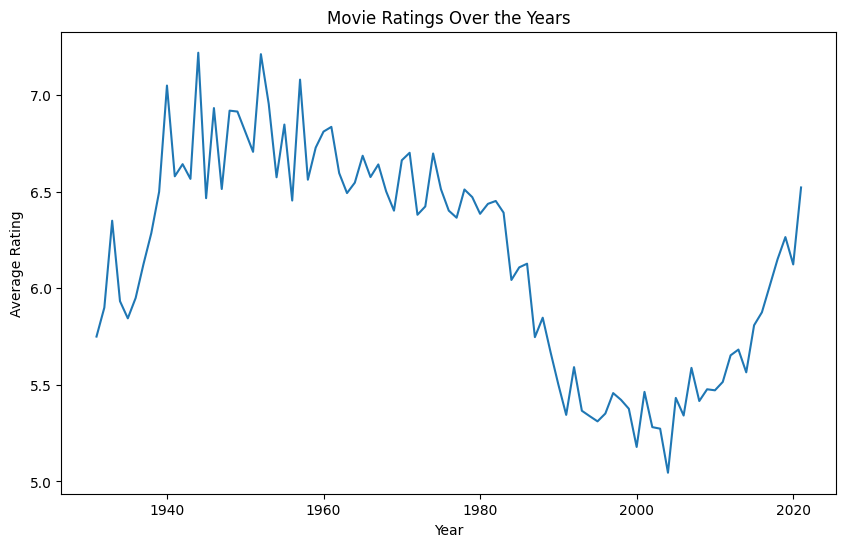

In [ ]:
dataset['Year'] = dataset['Year'].astype(int)
dataset['Rating'] = dataset['Rating'].astype(float)

ratings_by_year = dataset.groupby('Year')['Rating'].mean()

plt.figure(figsize=(10, 6))
ratings_by_year.plot()
plt.title('Movie Ratings Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

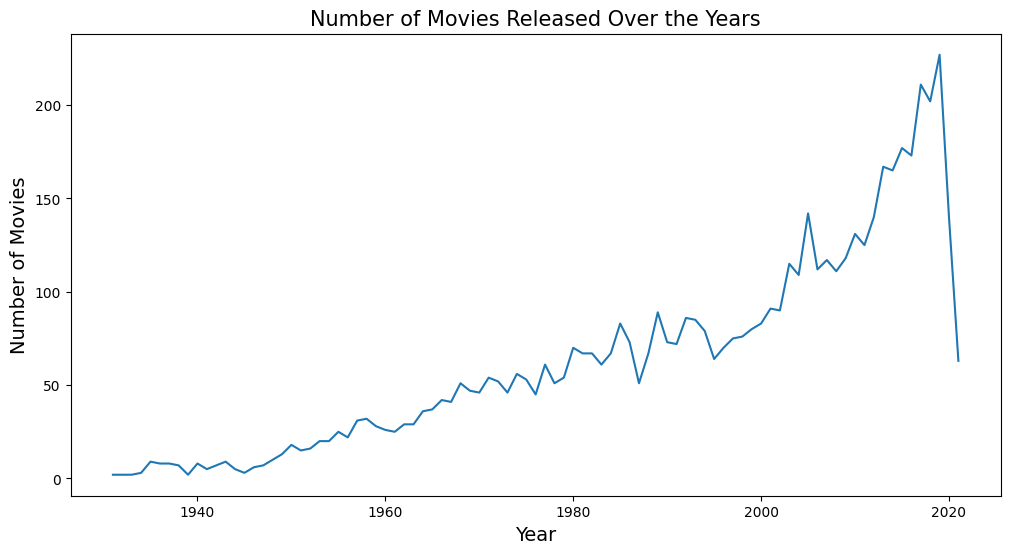

In [ ]:
dataset['Year'] = dataset['Year'].astype(int)

movies_by_year = dataset.groupby('Year').size()

plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values)
plt.title('Number of Movies Released Over the Years', fontsize = 15)
plt.xlabel('Year', fontsize =14)
plt.ylabel('Number of Movies', fontsize= 14)
plt.show()

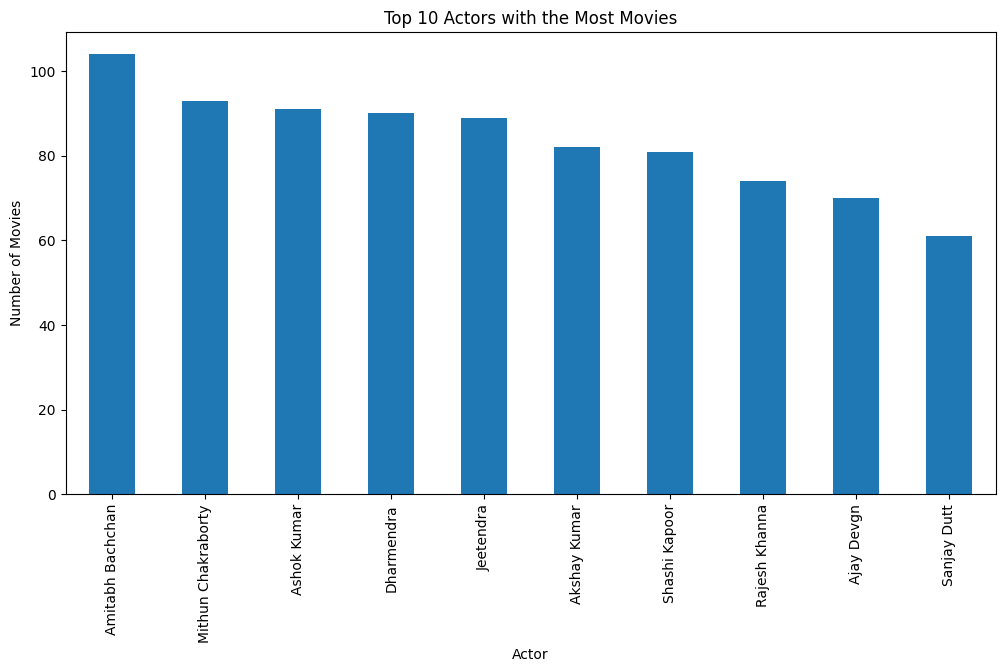

In [ ]:
plt.figure(figsize=(12, 6))

top_actors = dataset['Actor 1'].value_counts().sort_values(ascending=False).head(10)

top_actors.plot(kind='bar')
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

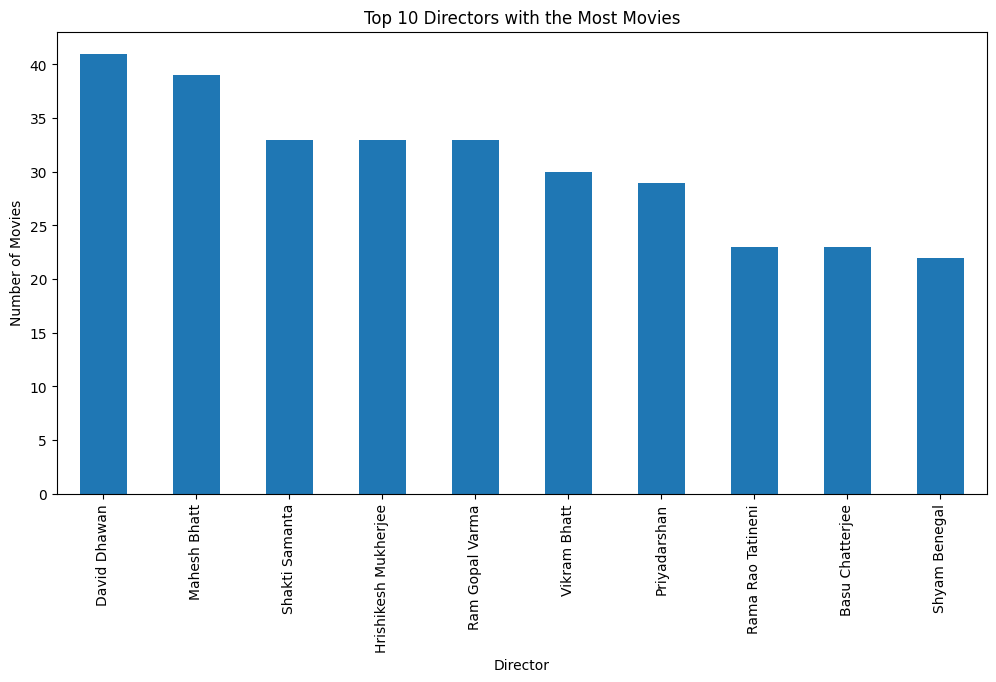

In [ ]:
plt.figure(figsize=(12, 6))

top_directors = dataset['Director'].value_counts().sort_values(ascending=False).head(10)

top_directors.plot(kind='bar')
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
datamodel = dataset[['Year', 'Votes', 'Duration', 'Director','Actor 1', 'Actor 2', 'Actor 3', 'Rating']]


In [ ]:
director_mean_rating = datamodel.groupby('Director')['Rating'].transform('mean')
datamodel['Director_encoded'] = director_mean_rating

actor1_mean_rating = datamodel.groupby('Actor 1')['Rating'].transform('mean')
datamodel['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = datamodel.groupby('Actor 2')['Rating'].transform('mean')
datamodel['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = datamodel.groupby('Actor 3')['Rating'].transform('mean')
datamodel['Actor3_encoded'] = actor3_mean_rating

In [ ]:

X = datamodel[[ 'Year', 'Votes', 'Duration','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = datamodel['Rating']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=24)

In [ ]:
datamodel.drop(['Actor 1', 'Actor 2', 'Actor 3', 'Director'], axis=1, inplace=True)
datamodel.head()

,Year,Votes,Duration,Rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
0,2019,8,109.0,7.0,7.000000,6.850000,7.000000,7.000000
1,2019,35,110.0,4.4,4.400000,5.420000,4.400000,4.450000
2,1997,827,147.0,4.7,5.313333,4.788889,5.786667,5.872727
3,2005,"1,086",142.0,7.4,7.383333,5.435000,6.933333,6.500000
4,2012,326,82.0,5.6,5.600000,5.600000,5.883333,5.600000


In [ ]:
datamodel.drop('Duration', axis=1, inplace=True)

In [ ]:
X = datamodel.drop(columns='Rating')
y = datamodel['Rating']



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
X_test.shape

(1138, 6)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

ValueError: ignored